In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.patches as patches

F_exp_dist = lambda x,lam: -np.log(1-x)/lam


# Basic tree network

In [ ]:
num_leaves = 4
node_per_leaf = 2
num_nodes = num_leaves * node_per_leaf # number of q nodes
num_bsms = num_leaves # number of BSMs

# num_vertices = num_nodes + 2* num_leaves
num_vertices = num_nodes + num_leaves +1

G = nx.Graph()
nodes_list = set(range(num_nodes))
vertices_list = set(range(num_vertices))
bsms_list = set([f"b{s}" for s in range(num_bsms)])
G.add_nodes_from(vertices_list, bipartite=0)
G.add_nodes_from(bsms_list, bipartite=1)

for leaf in range(num_leaves):
    for node in range(node_per_leaf):
        G.add_edge(node_per_leaf*leaf+node,num_nodes+leaf)
    G.add_edge(num_nodes+leaf,num_nodes+num_leaves)

color_dict = {0:'C0',1:'C1'}
color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]

pos_nodes = {q: (q,0) for q in range(num_nodes)}
pos_verts1 = {q: (node_per_leaf*(q% num_leaves)+0.5,1.5) for q in range(num_nodes,num_nodes+num_leaves)}
# pos_verts2 = {q: ((q% num_leaves)+num_leaves//2,3) for q in range(num_nodes+num_leaves,num_vertices)}
pos_verts2 = {q: (num_leaves,3) for q in range(num_nodes+num_leaves,num_vertices)}
pos_verts = pos_verts1 | pos_verts2
pos_bsms = {f"b{b}": (node_per_leaf*b+0.1,1) for b in range(num_bsms)}
pos = pos_nodes | pos_bsms | pos_verts

# connections = []
# for i in range(num_nodes):
#     for j in range(i+1,num_nodes):
#         connections.append((i,j))
# # print(connections)

fig, ax = plt.subplots(figsize=(8,4))

# plt.figure(figsize=(8,3))
nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# nx.draw(G,  with_labels=True, node_color = color_list)
# Draw a rectangle
for i in range(num_leaves):
    rectangle = patches.Rectangle((node_per_leaf*i-0.2, 1), 1.2, .5, linewidth=1, edgecolor='k', facecolor='none')
    ax.add_patch(rectangle)
plt.show()

In [ ]:
nx.shortest_path(G,1,4)

# Clos network

In [ ]:
n = 8 # starts from 4
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_ToR = 3
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

if n==4:
    conn_right = [7]
    conn_left = [8]
elif n==6:
    conn_right = [11,14]
    conn_left = [12,15]
elif n==8:
    conn_right = [15,19,23]
    conn_left = [16,20,24]

num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')

# bsms_list = set([f"b{s}" for s in range(num_bsms)])
# G.add_nodes_from(vertices_list, bipartite=0)
# G.add_nodes_from(bsms_list, bipartite=1)

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg)

# for i, agg in enumerate(agg_switches):
#     for j in range(n//2):
#         G.add_edge(agg,edge_switches[(i//2)+j*(n//2)])
#         # G.add_edge(agg,edge_switches[(n//2)*i+j+1])

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1])
    agg_conn[i1] -= 1 
    if edge in conn_left:
        extra_edges.append((edge,agg_switches[i1]))
        new_edges.append((edge,agg_switches[i1-1]))
    G.add_edge(edge,agg_switches[i1+1])
    agg_conn[i1+1] -= 1 
    if edge in conn_right:
        extra_edges.append((edge,agg_switches[i1+1]))
        new_edges.append((edge,agg_switches[i1+2]))

G.remove_edges_from(extra_edges)
G.add_edges_from(new_edges)

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j])
    
# for edge in conn_left:
#     G.
# color_dict = {0:'C0',1:'C1'}
# color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]

pos_core = {i: (i+ n/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n//2)% n,1) for i in agg_switches}
pos_edge = {i: (i-7*n/4+1,0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


fig, ax = plt.subplots(figsize=(8,4))

# plt.figure(figsize=(8,3))
nx.draw(G, pos, node_size=20)#,  with_labels=True)
# nx.draw(G,  with_labels=True, node_color = color_list)
# Draw a rectangle
# for i in range(num_leaves):
#     rectangle = patches.Rectangle((node_per_leaf*i-0.2, 1), 1.2, .5, linewidth=1, edgecolor='k', facecolor='none')
#     ax.add_patch(rectangle)
plt.show()

In [ ]:
num_nodes

# fat-tree

In [ ]:
n = 4 # starts from 4
num_core = n**2 // 4
num_agg = n * (n // 2)
num_edge = n * (n // 2)
num_nodes = num_edge * (n // 2) # number of q nodes
# num_bsms = num_leaves # number of BSMs

num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')

# bsms_list = set([f"b{s}" for s in range(num_bsms)])
# G.add_nodes_from(vertices_list, bipartite=0)
# G.add_nodes_from(bsms_list, bipartite=1)

for i_c, core in enumerate(core_switches):
    for i_a, agg in enumerate(agg_switches):
        if i_c % 2 ==0 and i_a % 2 ==0:
            G.add_edge(core,agg)
        if i_c % 2 ==1 and i_a % 2 ==1:
            G.add_edge(core,agg)

# new_edges = []
# extra_edges = []
# agg_conn = np.ones(num_agg)* (n//2)
# for i, edge in enumerate(edge_switches):
#     i1 = np.argwhere(agg_conn>0)[0,0]
#     G.add_edge(edge,agg_switches[i1])
#     agg_conn[i1] -= 1 
#     if edge in conn_left:
#         extra_edges.append((edge,agg_switches[i1]))
#         new_edges.append((edge,agg_switches[i1-1]))
#     G.add_edge(edge,agg_switches[i1+1])
#     agg_conn[i1+1] -= 1 
#     if edge in conn_right:
#         extra_edges.append((edge,agg_switches[i1+1]))
#         new_edges.append((edge,agg_switches[i1+2]))

# G.remove_edges_from(extra_edges)
# G.add_edges_from(new_edges)

for i_a, agg in enumerate(agg_switches):
    G.add_edge(agg,edge_switches[i_a])
    if i_a % 2 == 0:
        G.add_edge(agg,edge_switches[i_a+1])
    else:
        G.add_edge(agg,edge_switches[i_a-1])

for i, edge in enumerate(edge_switches):
    for j in range(n//2):
        G.add_edge(edge,node_list[(n//2)*i+j])
    
# for edge in conn_left:
#     G.
# color_dict = {0:'C0',1:'C1'}
# color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]

pos_core = {i: (i-n//2 + n**2/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n),1) for i in agg_switches}
pos_edge = {i: ((i-n-(n**2//2)),0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


fig, ax = plt.subplots(figsize=(8,4))

# plt.figure(figsize=(8,3))
nx.draw(G, pos, node_size=20,  with_labels=True)
# nx.draw(G,  with_labels=True, node_color = color_list)
# Draw a rectangle
# for i in range(num_leaves):
#     rectangle = patches.Rectangle((node_per_leaf*i-0.2, 1), 1.2, .5, linewidth=1, edgecolor='k', facecolor='none')
#     ax.add_patch(rectangle)
plt.show()

# HyperX

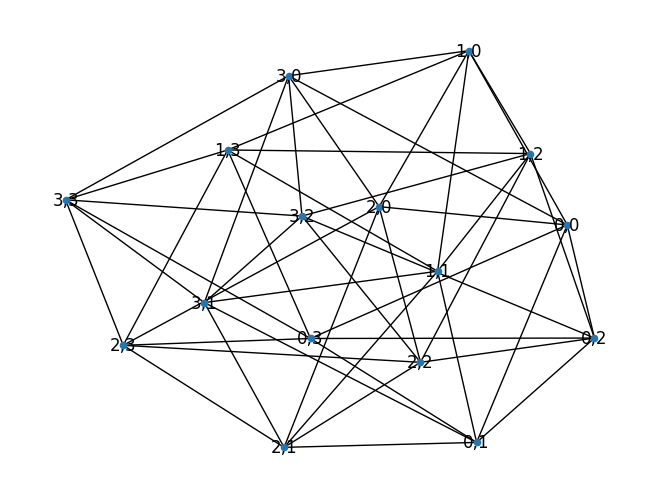

In [43]:
# S = [2, 4]# number of switches for each dim
S = 4 # number of switches for each dim (assuming uniform/regular hyperX network)
L = 2 #len(S) # number of lattice dims
K = 1 # link bandwidth
num_ToR = 4 # T: number of terminals (nodes per rack)
num_switches = S**L
num_nodes =  num_switches * num_ToR

G = nx.Graph()
edge_switches = [] #np.zeros(num_switches,L)
for sw in range(num_switches):
    result = ""
    for i_l in range(L):
        if sw > 0:
            remainder = sw % S
            result = f"{remainder}," + result
            sw //= S
        else:
            result = "0," + result

    edge_switches.append(result[:-1])

G.add_nodes_from(edge_switches, type='switch')

# node_list = range(1,num_nodes+1)
# G.add_nodes_from(node_list, type='node')

# for i, sw in enumerate(edge_switches):
#     for j in range(num_ToR):
#         G.add_edge(sw,node_list[num_ToR*i+j])

for i1, sw1 in enumerate(edge_switches):
    sw_vec = sw1.split(",")
    for i_l in range(L):
        sw_vals = list(set(range(S))-{int(sw_vec[i_l])})
        for i_s in sw_vals:
            sw2 = sw_vec[:]
            sw2[i_l]= f"{i_s}"
            
            G.add_edge(sw1,",".join(sw2))


nx.draw(G, node_size=20,  with_labels=True)
plt.show()


# simulation

In [ ]:
lam_gate_seq = 4  # mean of the Poisson distribution
size = 4  # size of the sequence

query_seq = np.random.poisson(lam_gate_seq, size)
query_seq = query_seq[np.argwhere(query_seq>0)[:,0]]
print("list:", query_seq)
for query in query_seq:
    if 2*query < num_nodes:
        g_node = random.sample(range(num_nodes), 2*query)
    else:
        # print("hi")
        g_node = np.arange(num_nodes)
        np.random.shuffle(g_node)
    # gate_seq = [(g_node[2*i],g_node[2*i+1]) for i in range((len(g_node)-1)//2+1)]
    gate_seq = [(node_list[g_node[2*i]],node_list[g_node[2*i+1]]) for i in range((len(g_node)-1)//2+1)]
    print(gate_seq)

In [ ]:

# plt.figure(figsize=(8,3))
# nx.draw(G, pos,  with_labels=True)#,  node_color = color_list)
# # nx.draw(G,  with_labels=True, node_color = color_list)
# plt.show()

lam_gate_seq = 8  # mean of the Poisson distribution
size = 4  # size of the sequence

query_seq = np.random.poisson(lam_gate_seq, size)
query_seq = query_seq[np.argwhere(query_seq>0)[:,0]]
print("list:", query_seq)
for query in query_seq:
    if 2*query < num_nodes:
        g_node = random.sample(range(num_nodes), 2*query)
    else:
        # print("hi")
        g_node = np.arange(num_nodes)
        np.random.shuffle(g_node)
    # gate_seq = [(g_node[2*i],g_node[2*i+1]) for i in range((len(g_node)-1)//2+1)]
    gate_seq = [(node_list[g_node[2*i]],node_list[g_node[2*i+1]]) for i in range((len(g_node)-1)//2+1)]


    gate_seq_iter = gate_seq.copy()
    # print("gate seq:", gate_seq)
    # print("num seq:", len(gate_seq))

    switch_time = []

    while len(gate_seq_iter)>0:
        bsm_stat = np.zeros(num_edge,dtype=np.int16)
        G_ins =  G.copy()
        # print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            # print(g)
            if nx.has_path(G_ins,g[0],g[1]):
                shortestpath = nx.shortest_path(G_ins,g[0],g[1])
                # print(shortestpath)
                
                sp = []
                for i in range(0,len(shortestpath)-1):
                    sp.append((shortestpath[i],shortestpath[i+1]))
                
                b = []
                for i, edge in enumerate(edge_switches):
                    if edge in shortestpath:
                        b.append(i)
                # b0 = g[0]//node_per_leaf
                # b1 = g[1]//node_per_leaf
                # print(b)
                
                if len(b)>1:
                    if bsm_stat[b[0]] == 0 and bsm_stat[b[1]] == 0:
                        bsm_stat[random.sample(b,1)] = 1
                        for u, v in sp:
                            G_ins.remove_edge(u, v)
                    elif bsm_stat[b[0]] == 0:
                        bsm_stat[b[0]] = 1
                        for u, v in sp:
                            G_ins.remove_edge(u, v)
                    elif bsm_stat[b[1]] == 0:
                        bsm_stat[b[1]] = 1
                        for u, v in sp:
                            G_ins.remove_edge(u, v)
                elif bsm_stat[b] == 0:
                    bsm_stat[b] = 1
                    for u, v in sp:
                        G_ins.remove_edge(u, v)

                # else:
                #     assert 0
                # # # print(bsm_stat)
                # print(bsm_stat)
                # plt.figure(figsize=(8,3))
                # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                # # nx.draw(G,  with_labels=True, node_color = color_list)
                # plt.show()
            else:
                inds_keep.append(i_g)

        switch_time.append(np.array(bsm_stat).sum())
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

    print("num seq:", len(gate_seq), switch_time)

# plots

In [ ]:
# network topology generating functions

def clos(n, num_ToR):
    # n = 8 # starts from 4
    num_core = n // 2
    num_agg = n
    num_edge = n**2 // 4
    # num_ToR = 3
    num_nodes = num_edge * num_ToR # number of q nodes
    # num_bsms = num_leaves # number of BSMs

    # if n==4:
    #     conn_right = [7]
    #     conn_left = [8]
    # elif n==6:
    #     conn_right = [11,14]
    #     conn_left = [12,15]
    # elif n==8:
    #     conn_right = [15,19,23]
    #     conn_left = [16,20,24]

    num_vertices = num_core + num_agg + num_edge + num_nodes

    G = nx.Graph()
    core_switches = range(num_core)
    G.add_nodes_from(core_switches, type='core')
    agg_switches = range(num_core,num_core+num_agg)
    G.add_nodes_from(agg_switches, type='agg')
    edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
    G.add_nodes_from(edge_switches, type='agg')
    node_list = range(num_core + num_agg + num_edge,num_vertices)
    G.add_nodes_from(node_list, type='node')

    for core in core_switches:
        for agg in agg_switches:
            G.add_edge(core,agg)

    # new_edges = []
    # extra_edges = []
    agg_conn = np.ones(num_agg)* (n//2)
    for i, edge in enumerate(edge_switches):
        i1 = np.argwhere(agg_conn>0)[0,0]
        G.add_edge(edge,agg_switches[i1])
        agg_conn[i1] -= 1 
        # if edge in conn_left:
        #     extra_edges.append((edge,agg_switches[i1]))
        #     new_edges.append((edge,agg_switches[i1-1]))
        G.add_edge(edge,agg_switches[i1+1])
        agg_conn[i1+1] -= 1 
    #     if edge in conn_right:
    #         extra_edges.append((edge,agg_switches[i1+1]))
    #         new_edges.append((edge,agg_switches[i1+2]))

    # G.remove_edges_from(extra_edges)
    # G.add_edges_from(new_edges)

    for i, edge in enumerate(edge_switches):
        for j in range(num_ToR):
            G.add_edge(edge,node_list[num_ToR*i+j])

    vertex_list = core_switches, agg_switches, edge_switches, node_list
    return G, vertex_list


In [ ]:
def time_spdc(k_list):
    harmonic = np.zeros(len(k_list))
    for i_k, k in enumerate(k_list):
        harmonic[i_k] = (1/np.arange(1,k+1)).sum()
    return harmonic

# time_spdc = lambda k: (1/np.arange(1,k+1)).sum()

def network_latency(G, node_list, num_edge, gen_rate, switch_duration, query_seq):
    # print(query_seq)
    num_nodes = len(node_list)
    latency = np.zeros(len(query_seq))
    for i_q, query in enumerate(query_seq):
        if 2*query < num_nodes:
            g_node = random.sample(range(num_nodes), 2*query)
        else:
            # print("hi")
            g_node = np.arange(num_nodes)
            np.random.shuffle(g_node)
        # gate_seq = [(g_node[2*i],g_node[2*i+1]) for i in range((len(g_node)-1)//2+1)]
        gate_seq = [(node_list[g_node[2*i]],node_list[g_node[2*i+1]]) for i in range((len(g_node)-1)//2+1)]
        # print(query, "gate seq:", gate_seq)

        gate_seq_iter = gate_seq.copy()

        switch_time = []
        while len(gate_seq_iter)>0:
            bsm_stat = np.zeros(num_edge,dtype=np.int16)
            G_ins =  G.copy()
            # print(gate_seq_iter)
            inds_keep = []
            for i_g, g in enumerate(gate_seq_iter):
                # print(g)
                if nx.has_path(G_ins,g[0],g[1]):
                    shortestpath = nx.shortest_path(G_ins,g[0],g[1])
                    # print(shortestpath)
                    
                    sp = []
                    for i in range(0,len(shortestpath)-1):
                        sp.append((shortestpath[i],shortestpath[i+1]))
                    
                    b = []
                    for i, edge in enumerate(edge_switches):
                        if edge in shortestpath:
                            b.append(i)
                   
                    if len(b)>1:
                        if bsm_stat[b[0]] == 0 and bsm_stat[b[1]] == 0:
                            bsm_stat[random.sample(b,1)] = 1
                            for u, v in sp:
                                G_ins.remove_edge(u, v)
                        elif bsm_stat[b[0]] == 0:
                            bsm_stat[b[0]] = 1
                            for u, v in sp:
                                G_ins.remove_edge(u, v)
                        elif bsm_stat[b[1]] == 0:
                            bsm_stat[b[1]] = 1
                            for u, v in sp:
                                G_ins.remove_edge(u, v)
                    elif bsm_stat[b] == 0:
                        bsm_stat[b] = 1
                        for u, v in sp:
                            G_ins.remove_edge(u, v)

                else:
                    inds_keep.append(i_g)

            switch_time.append(np.array(bsm_stat).sum())
            gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

        # print("num seq:", len(gate_seq), switch_time)
        latency[i_q] = 1/gen_rate*time_spdc(np.array(switch_time)).sum() + switch_duration*len(switch_time)
    return latency

In [ ]:
from network_utils import *
import random
import numpy as np

gen_rate = 1/(1e-2) # ebit average generation time in sec
switch_duration = 1e-3 # average switching delay in sec
Nrep = 200  # number of repetions for ensemble averaging

n_list = 4 # number of core switch ports
lam_gate_list = np.linspace(0.1,0.5,15)  # mean of the Poisson distribution
num_ToR_list = range(2,11,2)

T = np.zeros((len(n_list),len(lam_gate_list)))
dT = np.zeros((len(n_list),len(lam_gate_list)))
num_node_list =[]
for i_n, n in enumerate(n_list):

    # G, vertex_list = clos(n, num_ToR)
    G, vertex_list = fat_tree(n)
    core_switches, agg_switches, edge_switches, node_list = vertex_list
    num_node = len(node_list)
    num_node_list.append(num_node)
    print(i_tor,num_node)

    for i_l, lam_gate_seq in enumerate(lam_gate_list):
        query_seq = np.random.poisson(lam_gate_seq*num_node, Nrep)
        query_seq = query_seq[np.argwhere(query_seq>0)[:,0]]
        Tvals = network_latency(G, vertex_list, gen_rate, switch_duration, query_seq)
        T[i_n, i_l] = np.mean(Tvals)
        dT[i_n, i_l] = np.std(Tvals)
            

In [ ]:
for i_n, n in enumerate(n_list):
    # plt.plot(lam_gate_list,T[i_tor,:]*1e3,"-",label=f"{num_ToR}")
    plt.plot(num_node_list[i_n]*lam_gate_list,T[i_n,:]*1e3,"-",label=r"$n=$"+f"{n}")

plt.legend()
# plt.xlim(0,200)
# plt.ylim(1,250)
plt.xlabel("Average number of gates per round")
plt.ylabel("Average network latency per round [msec]")
plt.show()

# channel capacity/link bandwidth

In [44]:
import networkx as nx

# Create a graph with weighted edges
G = nx.Graph()
G.add_edge('A', 'B', weight=5)
G.add_edge('B', 'C', weight=3)
G.add_edge('C', 'D', weight=10)

# Find the shortest path considering edge weights
shortest_path = nx.shortest_path(G, 'A', 'D', weight='weight')
print("Shortest path considering edge weights:", shortest_path)

# You can also get the shortest path length
shortest_path_length = nx.shortest_path_length(G, 'A', 'D', weight='weight')
print("Shortest path length considering edge weights:", shortest_path_length)


Shortest path considering edge weights: ['A', 'B', 'C', 'D']
Shortest path length considering edge weights: 18


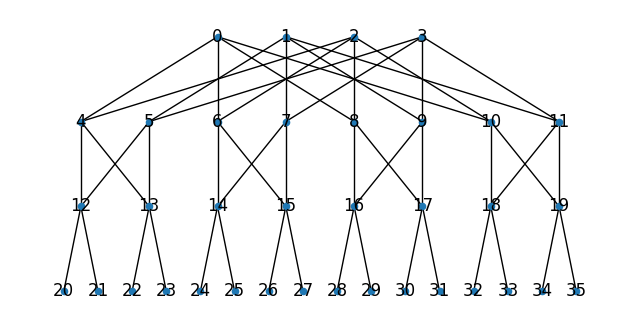

In [45]:
n = 4 # starts from 4
bandwidth = 4
num_core = n**2 // 4
num_agg = n * (n // 2)
num_edge = n * (n // 2)
num_nodes = num_edge * (n // 2) # number of q nodes

core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth
num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')


for i_c, core in enumerate(core_switches):
    for i_a, agg in enumerate(agg_switches):
        if i_c % 2 ==0 and i_a % 2 ==0:
            G.add_edge(core,agg, weight=core_bw)
        if i_c % 2 ==1 and i_a % 2 ==1:
            G.add_edge(core,agg, weight=core_bw)

for i_a, agg in enumerate(agg_switches):
    G.add_edge(agg,edge_switches[i_a], weight=agg_bw)
    if i_a % 2 == 0:
        G.add_edge(agg,edge_switches[i_a+1], weight=agg_bw)
    else:
        G.add_edge(agg,edge_switches[i_a-1], weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(n//2):
        G.add_edge(edge,node_list[(n//2)*i+j], weight=edge_bw)
    

pos_core = {i: (i-n//2 + n**2/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n),1) for i in agg_switches}
pos_edge = {i: ((i-n-(n**2//2)),0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


fig, ax = plt.subplots(figsize=(8,4))

# plt.figure(figsize=(8,3))
nx.draw(G, pos, node_size=20,  with_labels=True)
# nx.draw(G,  with_labels=True, node_color = color_list)
# Draw a rectangle
# for i in range(num_leaves):
#     rectangle = patches.Rectangle((node_per_leaf*i-0.2, 1), 1.2, .5, linewidth=1, edgecolor='k', facecolor='none')
#     ax.add_patch(rectangle)
plt.show()

[(33, 23), (32, 28), (22, 30), (24, 27), (34, 26), (20, 29), (21, 35), (25, 31)]
[0 0 0 0 0 0 1 0]


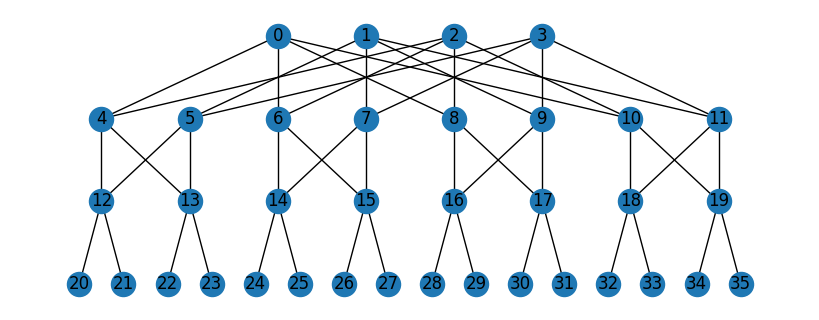

[0 0 0 0 1 0 1 0]


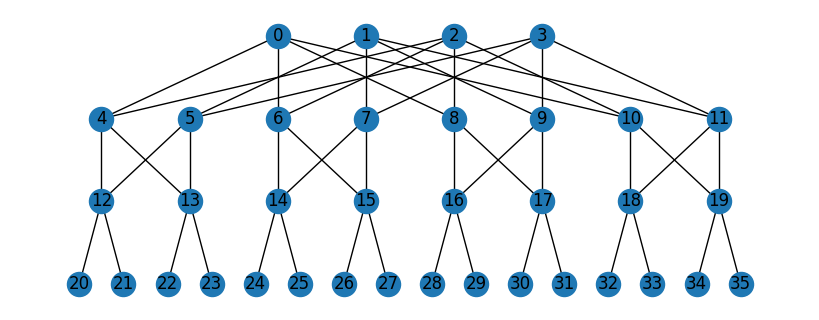

[0 1 0 0 1 0 1 0]


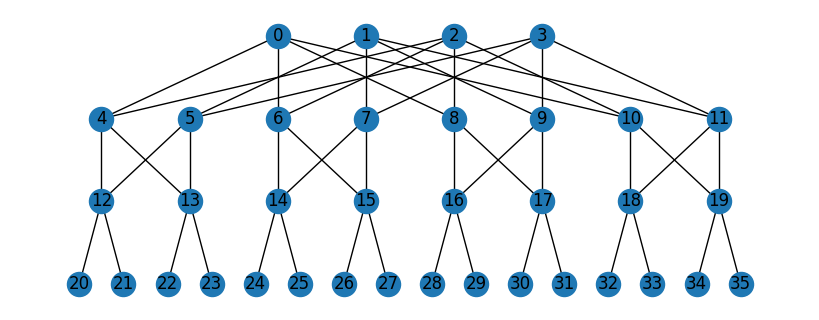

[0 1 1 0 1 0 1 0]


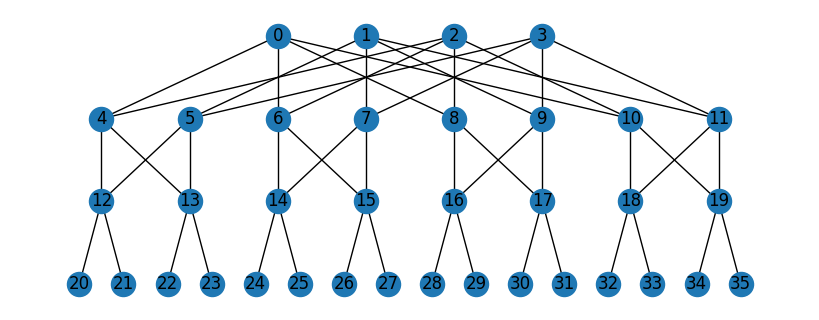

[0 1 1 1 1 0 1 0]


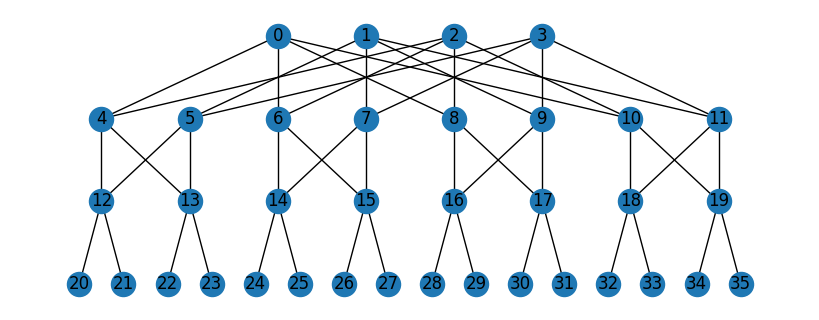

[1 1 1 1 1 0 1 0]


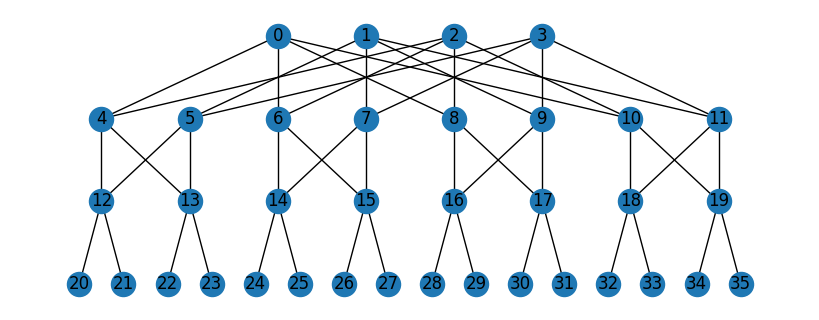

[1 1 1 1 1 0 1 1]


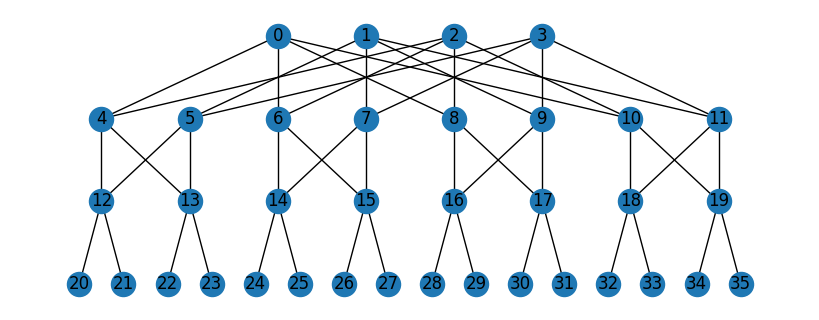

[1 1 1 1 1 1 1 1]


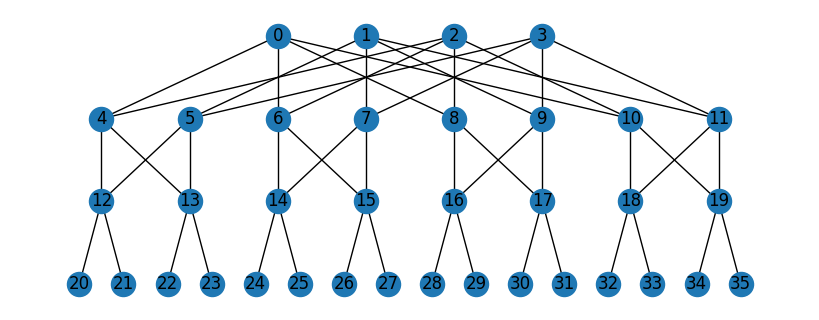

In [49]:

# plt.figure(figsize=(8,3))
# nx.draw(G, pos,  with_labels=True)#,  node_color = color_list)
# # nx.draw(G,  with_labels=True, node_color = color_list)
# plt.show()

lam_gate_seq = 8  # mean of the Poisson distribution
lam_bw = 3 # mean of links btw two nodes
Niter = 1  # size of the sequence

query_seq = np.random.poisson(lam_gate_seq, Niter)
query_seq = query_seq[np.argwhere(query_seq>0)[:,0]]
# print("list:", query_seq)
for query in query_seq:
    if 2*query < num_nodes:
        g_node = random.sample(range(num_nodes), 2*query)
        num_links = np.random.poisson(lam_bw, query)
    else:
        # print("hi")
        g_node = np.arange(num_nodes)
        np.random.shuffle(g_node)
        num_links = np.random.poisson(lam_bw, num_nodes//2)
    # gate_seq = [(g_node[2*i],g_node[2*i+1]) for i in range((len(g_node)-1)//2+1)]
    gate_seq = [(node_list[g_node[2*i]],node_list[g_node[2*i+1]]) for i in range((len(g_node)-1)//2+1)]


    gate_seq_iter = gate_seq.copy()
    # print("gate seq:", gate_seq)
    # print("num seq:", len(gate_seq))

    switch_time = []

    while len(gate_seq_iter)>0:
        bsm_stat = np.ones(num_edge,dtype=np.int16)* edge_bw
        G_ins =  G.copy()
        print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            # print(g)
            if nx.has_path(G_ins,g[0],g[1]):
                shortestpath = nx.shortest_path(G_ins,g[0],g[1],weight=None)
                # print(shortestpath)
                
                sp = []
                for i in range(0,len(shortestpath)-1):
                    sp.append((shortestpath[i],shortestpath[i+1]))
                
                b = []
                for i, edge in enumerate(edge_switches):
                    if edge in shortestpath:
                        b.append(i)

                
                if len(b)>1:
                    if bsm_stat[b[0]] > 0 and bsm_stat[b[1]] > 0:
                        bsm_stat[random.sample(b,1)] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
                    elif bsm_stat[b[0]] > 0:
                        bsm_stat[b[0]] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
    
                    elif bsm_stat[b[1]] > 0:
                        bsm_stat[b[1]] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
                elif bsm_stat[b] > 0:
                    bsm_stat[b] -= 1
                    for u, v in sp:
                        if G_ins[u][v]['weight'] == 1:
                                G_ins.remove_edge(u, v)
                        else:
                            G_ins[u][v]['weight'] -= 1
    
                # else:
                #     assert 0
                # # # print(bsm_stat)
                print(bsm_stat)
                plt.figure(figsize=(8,3))
                nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                # nx.draw(G,  with_labels=True, node_color = color_list)
                plt.show()
            else:
                inds_keep.append(i_g)

        switch_time.append(np.array(bsm_stat).sum())
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

    # print("num seq:", len(gate_seq), switch_time)

# old codes

In [ ]:

plt.figure(figsize=(8,3))
nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# nx.draw(G,  with_labels=True, node_color = color_list)
plt.show()


bsm_stat = np.zeros(num_bsms,dtype=np.int8)
for g in gate_seq:
    # print(g)

    g0_neighbors = [n for n in G.neighbors(g[0])]
    if len(g0_neighbors)>0:
        bsm_g0 = g0_neighbors[0]
        g0 = True
    else:
        g0 = False

    g1_neighbors = [n for n in G.neighbors(g[1])]
    if len(g1_neighbors)>0:
        bsm_g1 = g1_neighbors[0]
        g1 = True
    else:
        g1 = False

    if g0 and g1:
        if bsm_g0==bsm_g1:
            continue
        else:
            # G.remove_edge(g[1],bsm_g1)
            G.remove_node(bsm_g1)
            G.add_node(bsm_g1, bipartite=1)
            bsm_stat[int(bsm_g1.split("b")[-1])] = 0
            G.remove_node(bsm_g0)
            G.add_node(bsm_g0, bipartite=1)
            G.add_edge(g[0],bsm_g0)
            G.add_edge(g[1],bsm_g0)
    elif g0 and (not g1):
        G.remove_node(bsm_g0)
        G.add_node(bsm_g0, bipartite=1)
        G.add_edge(g[0],bsm_g0)
        G.add_edge(g[1],bsm_g0)

    elif g1 and (not g0):
        G.remove_node(bsm_g1)
        G.add_node(bsm_g1, bipartite=1)
        G.add_edge(g[0],bsm_g1)
        G.add_edge(g[1],bsm_g1)
    else:
        if len(np.argwhere(bsm_stat==0))>0:
            bsm_avail = np.argwhere(bsm_stat==0)[:,0].tolist()
            # print(bsm_avail)
            bsm_to_use = random.sample(bsm_avail, 1)[0]
            bsm_stat[bsm_to_use] = 1
            G.add_edge(g[0],f"b{bsm_to_use}")
            G.add_edge(g[1],f"b{bsm_to_use}")
        else:
            bsm_to_use = random.sample(list(bsms_list), 1)[0]
            G.remove_node(bsm_to_use)
            G.add_node(bsm_to_use, bipartite=1)
            G.add_edge(g[0],bsm_to_use)
            G.add_edge(g[1],bsm_to_use)


    # if node_stat[g[0]]==1:
    #     bsm_g = [n for n in G.neighbors(g[0])][0]
    #     print(g[0],bsm_g)
    #     G.remove_edge()
    # elif node_stat[g[1]]==1:
    #     bsm_g = [n for n in G.neighbors(g[1])][0]
    #     print(g[1],bsm_g)
    # else:
    # bsm_avail = np.argwhere(bsm_stat==0)[:,0]
    # G.add_edge(g[0],f"b{bsm_avail[0]}")
    # G.add_edge(g[1],f"b{bsm_avail[0]}")
    # bsm_stat[bsm_avail[0]] = 1
    # node_stat[g[0]] = 1
    # node_stat[g[1]] = 1

    plt.figure(figsize=(8,3))
    nx.draw(G, pos,  with_labels=True,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

    d_bsms, d_nodes = bipartite.degrees(G, nodes_list)
    for bsm_deg in d_bsms:
        assert (bsm_deg[1]== 0 or bsm_deg[1]== 2)
    for node_deg in d_nodes:
        assert (node_deg[1]== 0 or node_deg[1]== 1)
        


In [ ]:
# d_b, d_q = bipartite.degrees(G, nodes_list)
# print(d_b)
# for ds in d_b:
#     print(ds[1])

bsm_stat = np.zeros(num_bsms,dtype=np.int8)
node_stat = np.zeros(num_nodes,dtype=np.int8)
num_gates = 10
gate_seq = random.choices(connections, k=num_gates)
for g in gate_seq:
    print(g, node_stat)
    if (bsm_stat==1).sum()== bsm_stat.shape:
        break
    if node_stat[g[0]]==1 or node_stat[g[1]]==1:
        break
    bsm_avail = np.argwhere(bsm_stat==0)[:,0]
    G.add_edge(g[0],f"b{bsm_avail[0]}")
    G.add_edge(g[1],f"b{bsm_avail[0]}")
    bsm_stat[bsm_avail[0]] = 1
    node_stat[g[0]] = 1
    node_stat[g[1]] = 1

plt.figure(figsize=(8,3))
nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# nx.draw(G,  with_labels=True, node_color = color_list)
plt.show()


In [ ]:
lam = 2  # mean of the Poisson distribution
size = 100  # size of the sequence

query_seq = np.random.poisson(lam, size)
# print(query_seq)


k = query_seq[0]

random_entries = random.sample(connections, k)

for pair in random_entries:
    # if switch_config[pair[0]] > -1:
    #     switch_config[pair[0]] = 
    switch_matrix[pair[0],pair[1]] = 1

print("Randomly drawn entries:", random_entries)
print(switch_config)